<a href="https://colab.research.google.com/github/racego/regresion/blob/main/10_1_Predicci%C3%B3n_Regresi%C3%B3n_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [5]:
#Importar datos
df = pd.read_excel("/content/Análisis de regresión múltiple (Respuestas) (1).xlsx")
df.head(8)

,Marca temporal,CURSO,NOMBRE,APELLIDO,RECIBO,CONSUMO,NUMERO_DE_PERSONAS,VALOR_DEL_RECIBO
0,2024-07-26 20:51:16.458,1101,Marithza,Cuarez,https://drive.google.com/open?id=1VSueSOml90-q...,38,10,226178
1,2024-07-28 21:39:29.749,1102,Sara Sofía,Cano Cerón,https://drive.google.com/open?id=1D5O74oXjyme5...,22,3,114523
2,2024-07-29 16:06:07.812,1102,Oriana,Villada,https://drive.google.com/open?id=1s81UXvkevRKa...,32,6,130000
3,2024-07-29 17:45:09.642,1102,Danna Michel,Guio Fonseca,https://drive.google.com/open?id=10_0_sO411GHA...,22,9,63856
4,2024-07-29 17:46:31.685,1102,Danna Michel,Guio Fonseca,https://drive.google.com/open?id=1xFYPZcqSlgeq...,22,9,63856
5,2024-07-29 20:01:28.621,1102,Nicoll Samantha,Alonso Galeano,https://drive.google.com/open?id=1BwxQsGkGMNzB...,16,5,85606
6,2024-07-29 21:09:38.828,1101,Sheilyng kamila,Ruiz Soler,https://drive.google.com/open?id=1MwKIl0lHHttA...,12,3,38968
7,2024-07-29 21:27:47.442,1101,Estiben,Rodríguez,https://drive.google.com/open?id=1wYSv7FeZuXq1...,17,4,99407


In [6]:
#Seleccionar variables
x1 = "CONSUMO	"
x2 = "NUMERO_DE_PERSONAS"
y = "VALOR_DEL_RECIBO"

Coeficientes:  [ 7177.36944126 -3652.38136621]
Intercepción:  -41540.110090265895
Ecuación del plano: y = 7177.369 * CONSUMO + -3652.381 * NUMERO_DE_PERSONAS + -41540.11
Coeficiente de determinación:  0.86


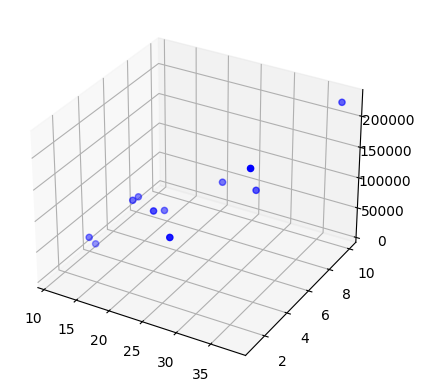

In [9]:
#Importar datos
df = pd.read_excel("/content/Análisis de regresión múltiple (Respuestas) (1).xlsx")
# Strip whitespace (including tabs) from column names
df.columns = df.columns.str.strip()
df.head(8)

#Seleccionar variables
x1 = "CONSUMO" # Removed tab from column name
x2 = "NUMERO_DE_PERSONAS"
y = "VALOR_DEL_RECIBO"

#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * CONSUMO + {} * NUMERO_DE_PERSONAS + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np

In [12]:
# Generar predicción

CONSUMO_TEORICO = 15
NUMERO_DE_PERSONAS_TEORICO = 3

prediccion_nueva = pd.DataFrame({x1: [CONSUMO_TEORICO], x2: [NUMERO_DE_PERSONAS_TEORICO]})
VALOR_DEL_RECIBO_TEORICO = modelo.predict(prediccion_nueva)
print('La predicción del costo del recibo para', CONSUMO_TEORICO, 'metros cubicos de consumo y', NUMERO_DE_PERSONAS_TEORICO, ' personas que consumen esos metros cubicos es de ', round(VALOR_DEL_RECIBO_TEORICO[0], 3))

La predicción del costo del recibo para 15 metros cubicos de consumo y 3  personas que consumen esos metros cubicos es de  55163.287
